In [ ]:
#This notebook contains the intermediate models which we tried, such as ResNet, Xception and other deeper models as described in the final report. 

In [ ]:
#Training images

!wget https://alabama.box.com/s/isylwsjb5wphq0owgjl1hx12xad81w2a

In [ ]:
!gzip -d Training_0.2.zip

In [ ]:
#Test images

!wget https://alabama.box.com/s/254plk0zo7uez06gvn1kjbqfb0li2brf

In [9]:
import glob
import numpy as np
import os.path as path
import imageio
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime
import keras
from keras import regularizers
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, precision_recall_curve, auc,recall_score
from keras.optimizers import Adam
from keras.regularizers import l2
import h5py
from sklearn.model_selection import GridSearchCV
from keras.backend import cast, greater, clip, floatx,epsilon
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from tensorflow import image
import tensorflow as tf
import pandas as pd

from keras.initializers import TruncatedNormal, RandomUniform
from keras import regularizers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import max_norm
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import Normalizer, StandardScaler

In [10]:
# Define image path (e.g.)

IMAGE_PATH = "/Users/adityaupreti/Desktop/PH582ML2021/FinalProject/Images/Training_0.2/"
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

In [11]:
# Load the images into a single variable and convert to a numpy array
images = [imageio.imread(path) for path in file_paths]
images = np.asarray(images)
print(images.shape)
# Get image size
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

# Scale images so values are between 0 and 1
images = images / 255

(13502, 200, 200, 4)
[200 200   4]


In [12]:
images.shape

(13502, 200, 200, 4)

In [5]:
np.save('images200x200.npy', images)

In [3]:
images = np.load('images200x200.npy')

In [4]:
#from tensorflow import image

In [13]:
images = image.resize(
    images, [100,100], method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None).numpy()

In [18]:
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

[100 100   4]


In [19]:
# Read the labels from the filenames

n_images = images.shape[0]
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    if filename[0] == 'W':                          #Every file that begins with W is assigned a 1
        labels[i] = 1
    else:
        labels[i] = 0

# Background = 0 = FALSE
# WIMPS = 1 = TRUE

In [20]:
# Split into test and training sets

TRAIN_TEST_SPLIT = 0.7           

# Split at the given index
split_index = int(TRAIN_TEST_SPLIT * n_images)
shuffled_indices = np.random.permutation(n_images)
train_indices = shuffled_indices[0:split_index]
test_indices = shuffled_indices[split_index:]

# Split the images and the labels
x_train = images[train_indices, :, :, :]
y_train = labels[train_indices]
x_val = images[test_indices, :, :, :]
y_val = labels[test_indices]

In [21]:
def create_model(activation='relu', kernel_size=3, kernel_initializer='TruncatedNormal', drop_rate=0.25, lr = 0.01): 
      shape = images.shape[1:]
      model = Sequential()
      model.add(Conv2D(32, activation=activation, kernel_size=kernel_size, padding='same', kernel_initializer=kernel_initializer, input_shape=shape))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(drop_rate))
      model.add(Conv2D(64, activation=activation, kernel_size=kernel_size, padding='same', kernel_initializer=kernel_initializer))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(drop_rate))
      model.add(Flatten())
      model.add(Dense(128, activation=activation, kernel_initializer=kernel_initializer))
      model.add(BatchNormalization())
      model.add(Dense(1, activation='sigmoid', kernel_initializer=kernel_initializer))
      model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
      return model 

In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1.e-6)
early_stopping_cb = EarlyStopping(monitor='loss', patience=5)
callbacks = [reduce_lr, early_stopping_cb]

In [23]:
estimator = KerasClassifier(create_model)

In [24]:
model = create_model(activation='elu', kernel_size=7, kernel_initializer='glorot_uniform', drop_rate=0.5, lr = 0.005)

In [26]:
history = model.fit(x_train,y_train,batch_size=50, epochs=50, validation_data=(x_val,y_val),callbacks=callbacks)

Epoch 1/50
190/190 [==============================] - 50s 263ms/step - loss: 0.3935 - accuracy: 0.8218 - precision: 0.8193 - recall: 0.8427 - val_loss: 8.4195 - val_accuracy: 0.4831 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
190/190 [==============================] - 50s 265ms/step - loss: 0.3714 - accuracy: 0.8361 - precision: 0.8323 - recall: 0.8569 - val_loss: 5.5971 - val_accuracy: 0.4831 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
190/190 [==============================] - 50s 266ms/step - loss: 0.3616 - accuracy: 0.8372 - precision: 0.8351 - recall: 0.8553 - val_loss: 1017.8255 - val_accuracy: 0.4831 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
190/190 [==============================] - 50s 266ms/step - loss: 0.3537 - accuracy: 0.8419 - precision: 0.8367 - recall: 0.8643 - val_loss: 5.6484 - val_accuracy: 0.4831 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
190/190 [==============================] - 51s

In [27]:
#Saving the trained model and its weights

model.save('CNNmodel_XENON_100x100_gridsearch.h5')

In [28]:
from keras.models import load_model

model = load_model('CNNmodel_XENON_100x100_gridsearch.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      6304      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        100416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

In [ ]:
from keras.models import load_model
from keras import backend as K
np.random.seed(0)
from sklearn import metrics
    
IMAGE_PATH = '/Users/adityaupreti/Desktop/PH582ML2021/FinalProject/Images/Test_0.2'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

# Load the images into a single variable and convert to a numpy array 
images = [imageio.imread(path) for path in file_paths]
images = np.asarray(images)

print(images.shape)

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

images = image.resize(
    images, [100,100], method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

# Scale images so values are between 0 and 1 
images = images / 255

n_images = images.shape[0]
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    if filename[0] == 'W':            #Every file that begins with W is assigned a 1
        labels[i] = 1
    elif filename[0] == 'E':
        labels[i] = 0

x_test = images
y_test = labels
y_test = np.asarray(y_test)

In [ ]:
# Evaluate on test set
from sklearn.metrics import roc_curve, auc


score = model.evaluate(x_test, y_test, verbose=1)
print('\nTest loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print('Test ROC AUC:', roc_auc)

In [ ]:
###ResNet

In [10]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [11]:
shape = (image_size[0], image_size[1], image_size[2])
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(Dense(1, activation='sigmoid', kernel_initializer='TruncatedNormal'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        12544     
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 25, 25, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 25, 25, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 25, 25, 64)        7

In [14]:
lr_init     = 1.e-3    # Initial learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr_init), metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [15]:
from keras.callbacks import ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1.e-6)
early_stopping_cb = EarlyStopping(monitor='loss', patience=5)
#filepath = '/Users/adityaupreti/Downloads/checkpoint/CNN_resnet.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
#checkpoint = ModelCheckpoint(filepath=filepath, 
#                             monitor='val_loss',
#                             verbose=1, 
#                             save_best_only=True,
#                             mode='min')

history=model.fit(x_train, y_train, batch_size=100, epochs=40,
        validation_data=(x_val, y_val),
        callbacks=[reduce_lr, early_stopping_cb], 
        verbose=1, shuffle=True)

Epoch 1/40
95/95 [==============================] - 143s 1s/step - loss: 0.5727 - accuracy: 0.7170 - precision: 0.7242 - recall: 0.7302 - val_loss: 7.1888 - val_accuracy: 0.5209 - val_precision: 0.5209 - val_recall: 1.0000
Epoch 2/40
95/95 [==============================] - 139s 1s/step - loss: 0.4867 - accuracy: 0.7997 - precision: 0.8067 - recall: 0.8042 - val_loss: 2.1869 - val_accuracy: 0.5209 - val_precision: 0.5209 - val_recall: 1.0000
Epoch 3/40
95/95 [==============================] - 139s 1s/step - loss: 0.4905 - accuracy: 0.7989 - precision: 0.8085 - recall: 0.8006 - val_loss: 0.9035 - val_accuracy: 0.5209 - val_precision: 0.5209 - val_recall: 1.0000
Epoch 4/40
95/95 [==============================] - 138s 1s/step - loss: 0.4933 - accuracy: 0.7910 - precision: 0.8014 - recall: 0.7918 - val_loss: 0.6590 - val_accuracy: 0.5611 - val_precision: 0.5428 - val_recall: 0.9967
Epoch 5/40
95/95 [==============================] - 139s 1s/step - loss: 0.4880 - accuracy: 0.7996 - precisi

In [17]:
from keras.models import load_model
from keras import backend as K
np.random.seed(0)
from sklearn import metrics
    
IMAGE_PATH = '/Users/adityaupreti/Desktop/PH582ML2021/FinalProject/Images/Test_0.2'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

# Load the images into a single variable and convert to a numpy array 
images = [imageio.imread(path) for path in file_paths]
images = np.asarray(images)

print(images.shape)

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

images = image.resize(
    images, [100,100], method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

# Scale images so values are between 0 and 1 
images = images / 255

n_images = images.shape[0]
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    if filename[0] == 'W':            #Every file that begins with W is assigned a 1
        labels[i] = 1
    elif filename[0] == 'E':
        labels[i] = 0

x_test = images
y_test = labels
y_test = np.asarray(y_test)

(5442, 200, 200, 4)
[200 200   4]
[100 100   4]


In [19]:
# Evaluate on test set
from sklearn.metrics import roc_curve, auc


score = model.evaluate(x_test, y_test, verbose=1)
print('\nTest loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print('Test ROC AUC:', roc_auc)

171/171 [==============================] - 22s 126ms/step - loss: 0.5382 - accuracy: 0.7279 - precision: 0.6935 - recall: 0.9111

Test loss / accuracy: 0.5382 / 0.7279
Test ROC AUC: 0.8376721321644904


Logistic: f1=0.788 auc=0.8728263


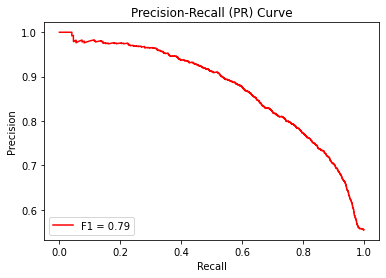

In [20]:
lr_probs = model.predict(x_test)    # Predict probabilities
yhat = model.predict(x_test)      # Predict class values
yhat = np.round(yhat)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1 = f1_score(y_test, yhat)
lr_auc = metrics.auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.7f' % (lr_f1, lr_auc))   # Summarise scores

''' plot the precision-recall curves '''
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot(lr_recall, lr_precision, 'r-', label='F1 = %0.2f' %(lr_f1))
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend(loc='lower left')
plt.title('Precision-Recall (PR) Curve')
pyplot.show()

Accuracy: 0.7278574053656743
Average precision: 0.6810904699386913
recall: 0.9110521075340192
AUC:0.826915397480559
Predicted   0.0   1.0
Actual               
0.0        1216  1213
1.0         268  2745


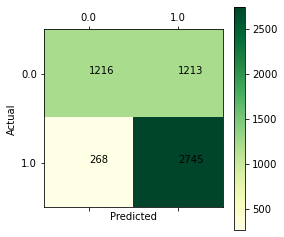

In [21]:
test_predictions = yhat             # Make a prediction on the test set
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy: " + str(accuracy))
average_precision = average_precision_score(y_test, test_predictions)
print("Average precision: " + str(average_precision))

from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
auc = metrics.auc(recall, precision)
recall1 = recall_score(y_test, np.round(test_predictions))
print("recall: " + str(recall1))
print('AUC:' +str(auc))


# Report Confusion Matrix
y_actu = pd.Series(y_test.ravel(), name='Actual')
y_pred = pd.Series(np.round(test_predictions.ravel()), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

# Plot confusion matrix
def plot_confusion_matrix(df_confusion, cmap='YlGn'):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(0,len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    for i in range(len(df_confusion.index)):
        for j in range(len(df_confusion.columns)):
            plt.text(j,i,str(df_confusion.iloc[i,j]))
    plt.show()

plot_confusion_matrix(df_confusion)

In [28]:
shape = (image_size[0], image_size[1], image_size[2])
lr_init     = 1.e-3    # Initial learning rate
model = Sequential()
model.add(Conv2D(16,kernel_size=3, padding='same', input_shape=shape))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Conv2D(16,kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, activation='selu', kernel_size=3, padding='same', kernel_initializer='lecun_normal'))
#model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())
#model.add(Conv2D(64, activation='selu', kernel_size=3, padding='same', kernel_initializer='lecun_normal'))
#model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(256, activation='relu', kernel_initializer='TruncatedNormal'))
#model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_initializer='TruncatedNormal'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr_init), metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 16)      592       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)       

In [11]:
model.load_weights('/Users/adityaupreti/Downloads/checkpoint/CNN_relu_125_125.epoch06-loss0.46.hdf5')

In [29]:
from keras.callbacks import ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1.e-6)
early_stopping_cb = EarlyStopping(monitor='loss', patience=5)
#filepath = '/Users/adityaupreti/Downloads/checkpoint/CNN_elu_100_100.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
#checkpoint = ModelCheckpoint(filepath=filepath, 
#                             monitor='val_loss',
#                             verbose=1, 
#                             save_best_only=True,
#                             mode='min')

history=model.fit(x_train, y_train, batch_size=100, epochs=40,
                  validation_data=(x_val, y_val),
                  callbacks=[reduce_lr, early_stopping_cb],
                  verbose=1, shuffle=True)

Epoch 1/40
95/95 [==============================] - 21s 215ms/step - loss: 0.4949 - accuracy: 0.7728 - precision_1: 0.7763 - recall_1: 0.7894 - val_loss: 1.8816 - val_accuracy: 0.5172 - val_precision_1: 0.5172 - val_recall_1: 1.0000
Epoch 2/40
95/95 [==============================] - 18s 192ms/step - loss: 0.3195 - accuracy: 0.8605 - precision_1: 0.8560 - recall_1: 0.8777 - val_loss: 4.6841 - val_accuracy: 0.5172 - val_precision_1: 0.5172 - val_recall_1: 1.0000
Epoch 3/40
95/95 [==============================] - 18s 190ms/step - loss: 0.2880 - accuracy: 0.8764 - precision_1: 0.8743 - recall_1: 0.8936 - val_loss: 2.4258 - val_accuracy: 0.5172 - val_precision_1: 0.5172 - val_recall_1: 1.0000
Epoch 4/40
95/95 [==============================] - 18s 186ms/step - loss: 0.2560 - accuracy: 0.8957 - precision_1: 0.8928 - recall_1: 0.9069 - val_loss: 2.5792 - val_accuracy: 0.5172 - val_precision_1: 0.5172 - val_recall_1: 1.0000
Epoch 5/40
95/95 [==============================] - 17s 181ms/step -

In [30]:
#Saving the trained model and its weights

model.save('CNNmodel_XENON_100x100_leakyrelu.h5')

In [31]:
from keras.models import load_model

model = load_model('CNNmodel_XENON_100x100_leakyrelu.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 16)      592       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)       

In [29]:
from keras.models import load_model
from keras import backend as K
np.random.seed(0)
from sklearn import metrics
    
IMAGE_PATH = '/Users/adityaupreti/Desktop/PH582ML2021/FinalProject/Images/Test_0.2'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

# Load the images into a single variable and convert to a numpy array 
images = [imageio.imread(path) for path in file_paths]
images = np.asarray(images)

print(images.shape)

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

images = image.resize(
    images, [100,100], method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

# Scale images so values are between 0 and 1 
images = images / 255

n_images = images.shape[0]
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    if filename[0] == 'W':            #Every file that begins with W is assigned a 1
        labels[i] = 1
    elif filename[0] == 'E':
        labels[i] = 0

x_test = images
y_test = labels
y_test = np.asarray(y_test)

(5442, 200, 200, 4)
[200 200   4]
[100 100   4]


In [30]:
from sklearn.metrics import roc_curve, auc


# Evaluate on test set
score = model.evaluate(x_test, y_test, verbose=1)
print('\nTest loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print('Test ROC AUC:', roc_auc)

171/171 [==============================] - 8s 47ms/step - loss: 0.4594 - accuracy: 0.7964 - precision: 0.7349 - recall: 0.9890

Test loss / accuracy: 0.4594 / 0.7964
Test ROC AUC: 0.94574450743635


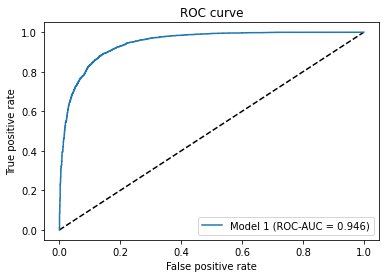

In [31]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.legend(loc=2, prop={'size': 15})
plt.plot(fpr, tpr, label='Model 1 (ROC-AUC = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

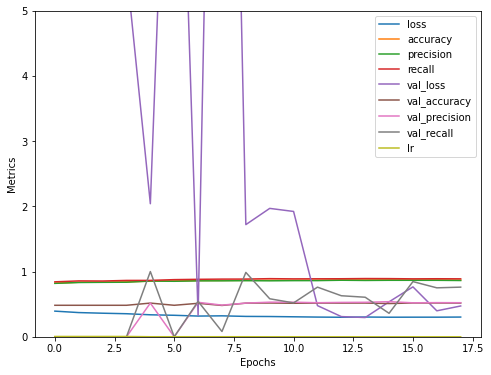

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.gca().set_ylim(0,5)
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()

Logistic: f1=0.843 auc=0.9510039


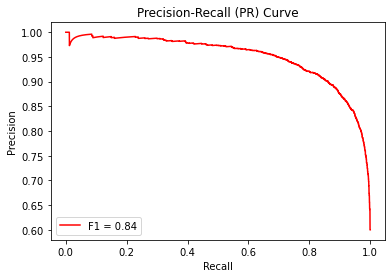

In [33]:
lr_probs = model.predict(x_test)    # Predict probabilities
yhat = model.predict(x_test)      # Predict class values
yhat = np.round(yhat)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1 = f1_score(y_test, yhat)
lr_auc = metrics.auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.7f' % (lr_f1, lr_auc))   # Summarise scores

''' plot the precision-recall curves '''
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot(lr_recall, lr_precision, 'r-', label='F1 = %0.2f' %(lr_f1))
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend(loc='lower left')
plt.title('Precision-Recall (PR) Curve')
pyplot.show()

Accuracy: 0.7963983829474458
Average precision: 0.7329101699603819
recall: 0.9890474610023232
AUC:0.8650032996013374
Predicted   0.0   1.0
Actual               
0.0        1354  1075
1.0          33  2980


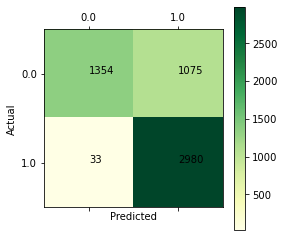

In [34]:
test_predictions = yhat             # Make a prediction on the test set
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy: " + str(accuracy))
average_precision = average_precision_score(y_test, test_predictions)
print("Average precision: " + str(average_precision))

from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
auc = metrics.auc(recall, precision)
recall1 = recall_score(y_test, np.round(test_predictions))
print("recall: " + str(recall1))
print('AUC:' +str(auc))


# Report Confusion Matrix
y_actu = pd.Series(y_test.ravel(), name='Actual')
y_pred = pd.Series(np.round(test_predictions.ravel()), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

# Plot confusion matrix
def plot_confusion_matrix(df_confusion, cmap='YlGn'):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(0,len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    for i in range(len(df_confusion.index)):
        for j in range(len(df_confusion.columns)):
            plt.text(j,i,str(df_confusion.iloc[i,j]))
    plt.show()

plot_confusion_matrix(df_confusion)

In [ ]:
#Xecption model implementation

In [ ]:
#changing from channel 4 to greyscale

In [39]:
# Load the images into a single variable and convert to a numpy array
images = [imageio.imread(path) for path in file_paths]
images = np.asarray(images)
print(images.shape)
# Get image size
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

(5442, 200, 200, 4)
[200 200   4]


In [4]:
images = image.resize(
    images, [75,75], method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None).numpy()

In [5]:
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

[75 75  4]


In [8]:
shape = (image_size[0], image_size[1], image_size[2])
lr_init     = 1.e-3    # Initial learning rate

In [9]:
base_model = keras.applications.xception.Xception(weights=None,input_shape=shape, 
                                                  include_top=False)
avg    = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(1, activation='sigmoid', kernel_initializer='TruncatedNormal')(avg)
model  = keras.models.Model(inputs=base_model.input, outputs=output)

/Users/adityaupreti/miniforge3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/applications/imagenet_utils.py:331: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  warnings.warn('This model usually expects 1 or 3 input channels. '


In [10]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [11]:
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=lr_init), 
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 4)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 37, 37, 32)   1152        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 37, 37, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 37, 37, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1.e-6)
early_stopping_cb = EarlyStopping(monitor='loss', patience=5)
filepath = '/Users/adityaupreti/Downloads/checkpoint/CNN_xception.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


history=model.fit(x_train, y_train,\
        batch_size=100,\
        epochs=40,\
        validation_data=(x_val, y_val),\
        callbacks=[reduce_lr, early_stopping_cb, checkpoint],\
        verbose=1, shuffle=True)

Epoch 1/40
95/95 [==============================] - 193s 2s/step - loss: 0.5269 - accuracy: 0.7467 - precision: 0.7625 - recall: 0.7466 - val_loss: 0.6941 - val_accuracy: 0.5162 - val_precision: 0.5162 - val_recall: 1.0000

Epoch 00001: val_loss improved from inf to 0.69407, saving model to /Users/adityaupreti/Downloads/checkpoint/CNN_xception.epoch01-loss0.69.hdf5
Epoch 2/40
95/95 [==============================] - 190s 2s/step - loss: 0.3498 - accuracy: 0.8466 - precision: 0.8000 - recall: 0.9378 - val_loss: 0.7101 - val_accuracy: 0.5162 - val_precision: 0.5162 - val_recall: 1.0000

Epoch 00002: val_loss did not improve from 0.69407
Epoch 3/40
95/95 [==============================] - 191s 2s/step - loss: 0.3594 - accuracy: 0.8447 - precision: 0.7971 - recall: 0.9363 - val_loss: 0.7583 - val_accuracy: 0.5162 - val_precision: 0.5162 - val_recall: 1.0000

Epoch 00003: val_loss did not improve from 0.69407
Epoch 4/40
95/95 [==============================] - 189s 2s/step - loss: 0.3575 - 

In [14]:
#Saving the trained model and its weights

model.save('CNNmodel_XENON_150x150_selu.h5')

In [1]:
from keras.models import load_model

model = load_model('Xception_XENON_100x100.h5')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 4) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   1152        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [29]:
import visualkeras

In [30]:
visualkeras.layered_view(model).show() # display using your system viewer

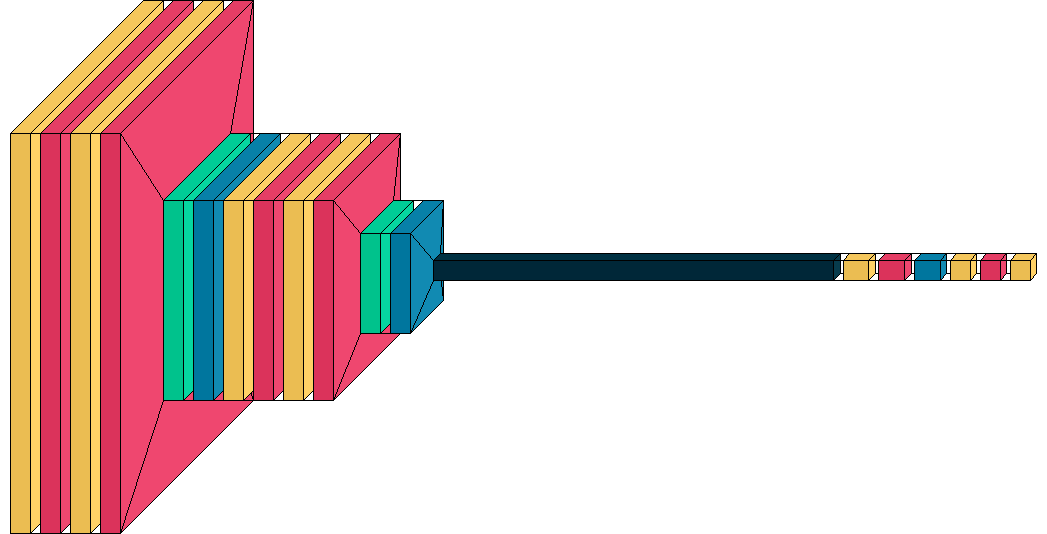

In [32]:
visualkeras.layered_view(model, to_file='CNNmodel_output.png') # write to disk

In [ ]:
#additional cells....

In [4]:
from keras.models import load_model

model = load_model('CNNmodel_XENON.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      1184      
_________________________________________________________________
batch_normalization_12 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)       